In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

In [ ]:
ratings.info()


In [ ]:
movies.info()

In [ ]:
ratings.head()

In [ ]:
movies.head()

In [ ]:
ratings.describe()

In [ ]:
movies.describe(include='object')

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
movie_ratings_count = ratings['movieId'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings_count, bins=50, kde=True)
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.xscale('log')
plt.show()

In [ ]:
df = pd.merge(ratings, movies, on='movieId')

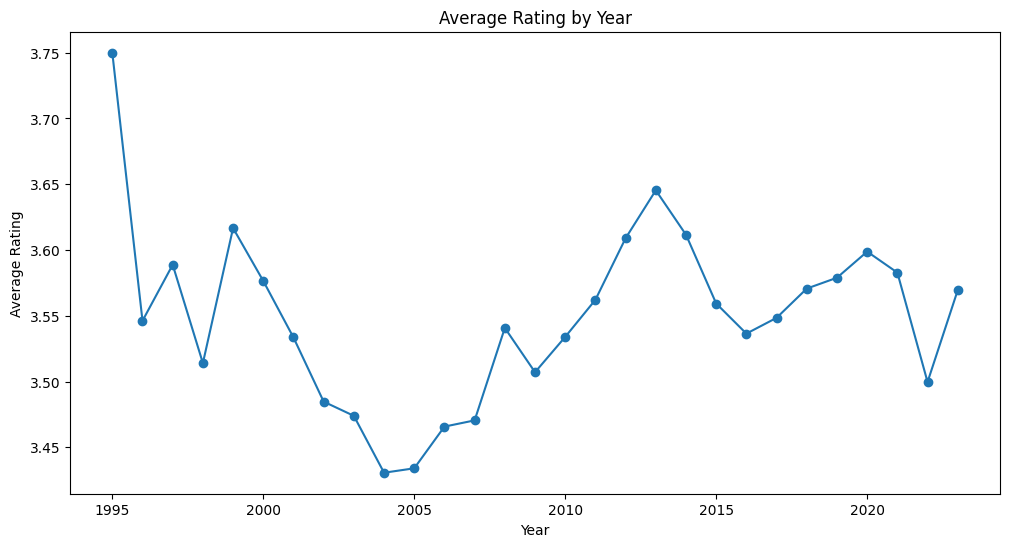

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['timestamp'].dt.year

yearly_ratings = df.groupby('year')['rating'].agg(['mean', 'count'])
plt.figure(figsize=(12, 6))
plt.plot(yearly_ratings.index, yearly_ratings['mean'], marker='o')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

This plot shows how average ratings have changed over time. There's quite of a drop around 2005 which is quite intertesting, this might indicate the movie during that time period is not so good? 

The average rating then increases from time to time until it hits early 2015 where the rating started to come down again.



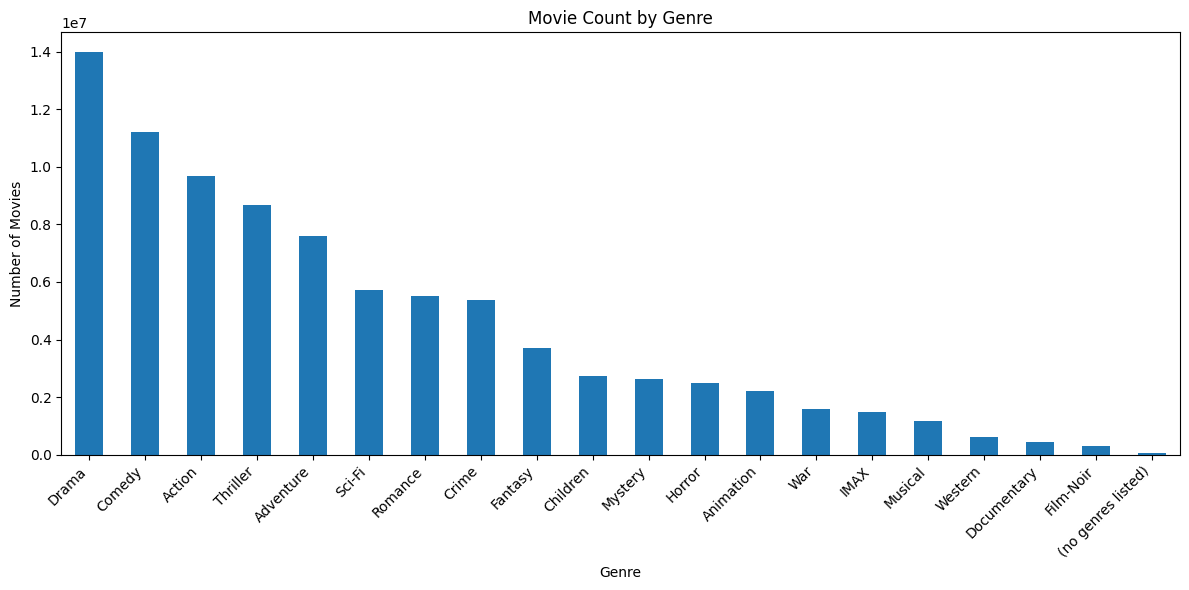

In [8]:
genres = df['genres'].str.get_dummies(sep='|')
genre_counts = genres.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Movie Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart shows the distribution of movies across different genres. 

We can easily identify Drama is the most common genre in this dataset, follow up by Comedy. 

The least common genres are Documentary and Film-Noir

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


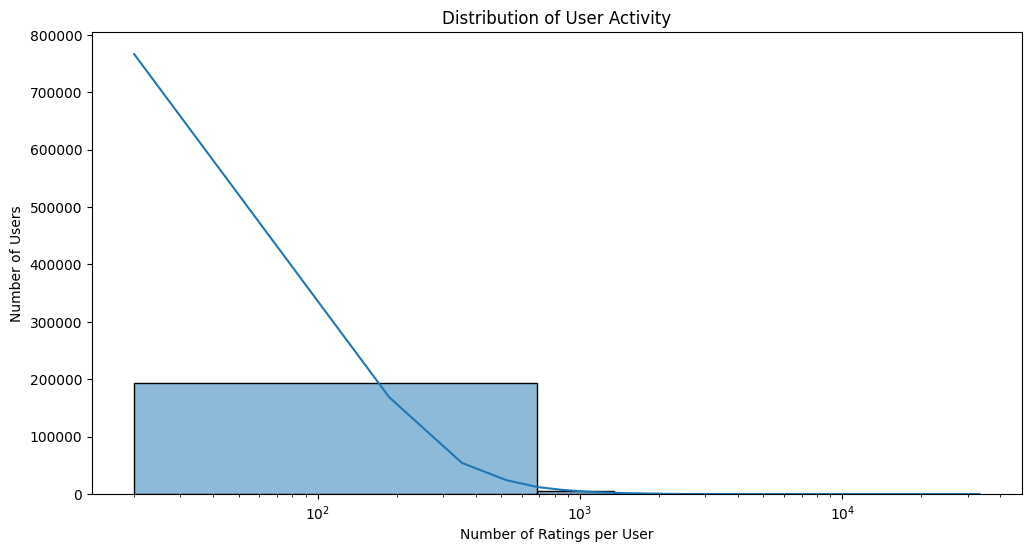

In [9]:
user_activity = df.groupby('userId')['rating'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.histplot(user_activity, bins=50, kde=True)
plt.title('Distribution of User Activity')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.xscale('log')
plt.show()

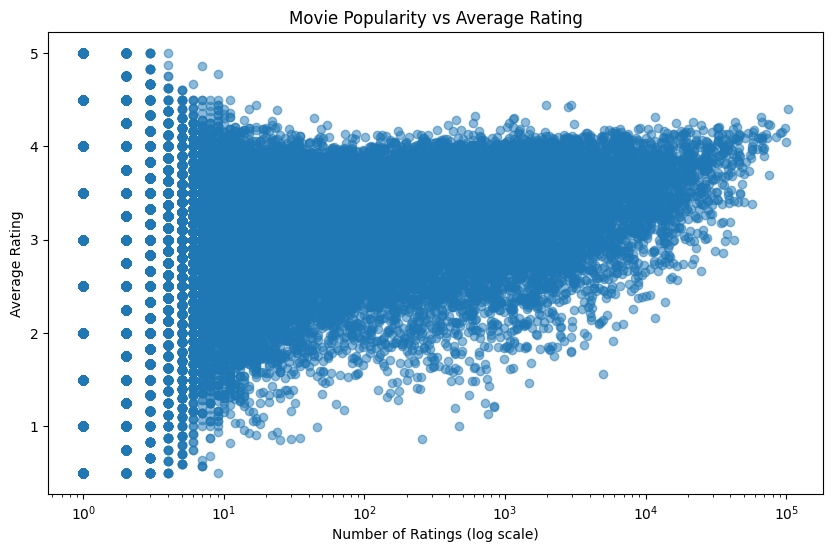

In [10]:
movie_stats = df.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'num_ratings']

plt.figure(figsize=(10, 6))
plt.scatter(movie_stats['num_ratings'], movie_stats['avg_rating'], alpha=0.5)
plt.xscale('log')
plt.title('Movie Popularity vs Average Rating')
plt.xlabel('Number of Ratings (log scale)')
plt.ylabel('Average Rating')
plt.show()

As the number of ratings increases (moving right on the x-axis), the spread of average ratings narrows.

Very unpopular movies (far left) have a wide range of average ratings, from very low to very high (5.0).

Highly popular movies (far right) tend to have average ratings clustered between about 3.0 and 4.5.

There's a slight upward trend in the lower bound of ratings as popularity increases, suggesting that very popular movies rarely have extremely low average ratings.


Popular movies tend to have more consistent ratings, likely due to larger sample sizes.
Unpopular movies show more rating volatility, possibly due to smaller sample sizes.

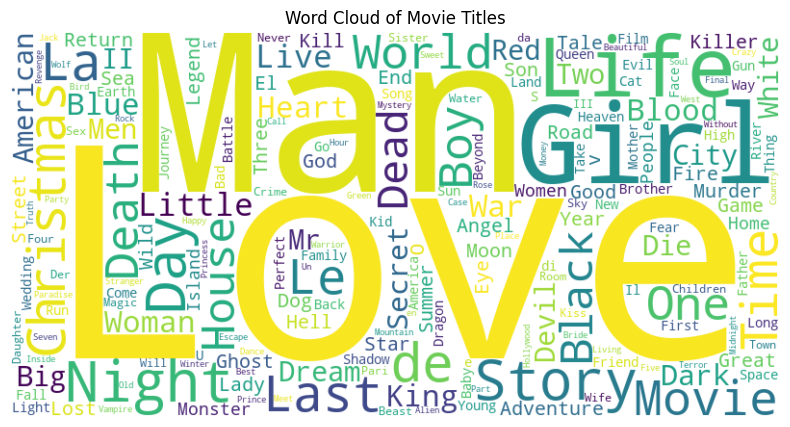

In [12]:
from wordcloud import WordCloud

title_text = ' '.join(movies['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

"Love" and "Man" are the two most dominant words, followed by "Life" and "Girl". This kinda makes sense to the previous graphs on the counts of movies genres since the most common genre was Drama, which involved a lot around these key words. These titles also focus on specific character and some of them also focus on time periods (i.e "Day" and "Night")

The prevalence of words like "Last," "New," and "First" suggests many movies are part of series or emphasize novelty.
